In [34]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
# Import results generated from strategy.ipynb script
df_results = pd.read_csv('results.csv')
df_results = df_results.drop(columns='Unnamed: 0')

In [35]:
# Create function to plot buy and sell trades for a certain SMA, HP combination
def plot_trades(df_results,sma,hp,signal):
    df_plot = df_results.loc[(df_results['SMA_periods']==sma) & (df_results['HP']==sma)].reset_index()
    df_plot['Signal'] = np.where(df_plot['Signal']!=signal,np.nan,df_plot['Signal'])
    df_plot['Exit_Signal'] = df_plot['Signal'].shift(10)
    df_plot['Date'] = pd.to_datetime(df_plot['Date'])  
    entry_signals = df_plot.loc[df_plot['Signal']==signal]
    exit = df_plot.loc[df_plot['Exit_Signal']==signal]
    fig, ax = plt.subplots(figsize=(15,5))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.plot(df_plot['Date'],df_plot['Close'])
    ax.plot(df_plot['Date'],df_plot['SMA'])
    for idx in entry_signals.index.tolist():
        ax.plot(df_plot.loc[idx]['Date'],df_plot.loc[idx]['Close'],"gx",markersize=10)
    for idx in exit.index.tolist():
        ax.plot(df_plot.loc[idx]['Date'],df_plot.loc[idx]['Close'],"rx",markersize=10)
    plt.xticks(rotation=45)
    plt.show()

In [37]:
# Calculate mean, max and min returns, number of trades and percentage of positive trades for each SMA, holding period and signal combination
df_trades = df_results.loc[~df_results['Signal'].isna()]
grouped = df_trades.groupby(['SMA_periods','HP','Signal'])
df_returns = grouped['Trade'].agg(['mean','max','min','count'])
df_returns = df_returns.rename(columns={'count':'number_of_trades'})
df_returns['%_positive_trades'] = grouped['Trade'].apply(lambda x: (x>0).sum() / len(x))
df_returns['max_min_ratio'] = df_returns['max'] / abs(df_returns['min'])
df_returns = df_returns.reset_index()
df_returns.sort_values(by='mean',ascending=False).head(5)

,SMA_periods,HP,Signal,mean,max,min,number_of_trades,%_positive_trades,max_min_ratio
1695,85.0,240,1.0,0.590030,1.273689,0.078249,4,0.400000,16.277483
1693,85.0,235,1.0,0.563613,1.221258,0.084650,4,0.400000,14.427118
1697,85.0,245,1.0,0.562624,1.067112,0.105232,4,0.400000,10.140578
1699,85.0,250,1.0,0.475262,1.211344,-0.049160,5,0.363636,24.640678
1197,60.0,245,1.0,0.455108,0.854557,-0.050366,5,0.571429,16.966837


In [42]:
# Filter strategies by chosen criteria: > 50 trades, positive mean and max-min ratio >= 3
min_no_of_trades = 50
min_mean = 0
minimum_max_min_ratio = 3

df_eligible = df_returns.loc[(df_returns['number_of_trades']>=min_no_of_trades)]
df_eligible = df_eligible.loc[(df_eligible['mean']>=min_mean)]
df_eligible = df_eligible.loc[(df_eligible['max_min_ratio']>=minimum_max_min_ratio)]
df_eligible.sort_values('mean',ascending=False).head(3)

,SMA_periods,HP,Signal,mean,max,min,number_of_trades,%_positive_trades,max_min_ratio
1402,75.0,10,-1.0,0.011787,0.456421,-0.076038,57,0.508772,6.002568
1304,70.0,15,-1.0,0.008030,0.547021,-0.095052,50,0.431373,5.754981
610,35.0,30,-1.0,0.007492,0.577272,-0.159124,53,0.545455,3.627803


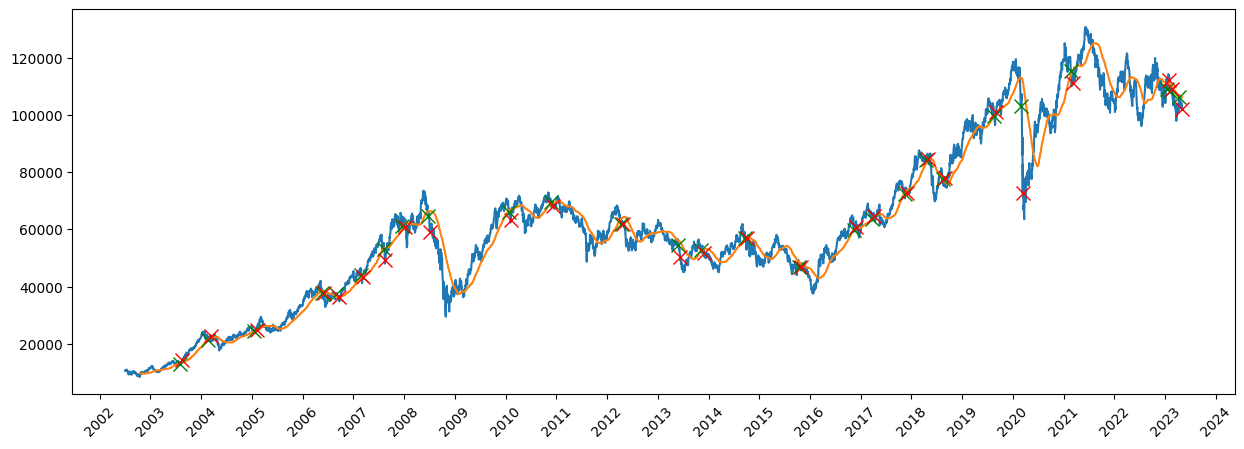

In [43]:
# Example of a plot using SMA = 75, HP = 10 and only sell signals
plot_trades(df_results,75,10,-1)